
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        self.std[self.std == 0] = 1.0

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been Fitted yet.")

        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


The Loss function with L2 Regularization (Ridge) is:

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$$

The gradient update rules are:

$$w = w - \alpha \left( \frac{1}{m} X^T (\hat{y} - y) + \frac{\lambda}{m} w \right)$$

$$b = b - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \right)$$

In [27]:

class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        self.history = []

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            error = y_pred - y
            mse = (1 / (2*n_samples)) * np.sum(error**2)
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            total_loss = mse + l2_penalty
            self.history.append(total_loss)

            dw = (1 / n_samples) * np.dot(X.T, error) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


Testing Linear Regression

Generate Data : y = 4 + 3x + noise

In [28]:
X_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X_train.flatten() + np.random.randn(100) * 0.5

Apply Scaling

In [29]:
scaler = StandardScalerManual()
X_train_scaled = scaler.fit_transform(X_train)

Training Model

In [30]:
lin_reg = LinearRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
lin_reg.fit(X_train_scaled, y_train)
predictions = lin_reg.predict(X_train_scaled)

Plotting Results

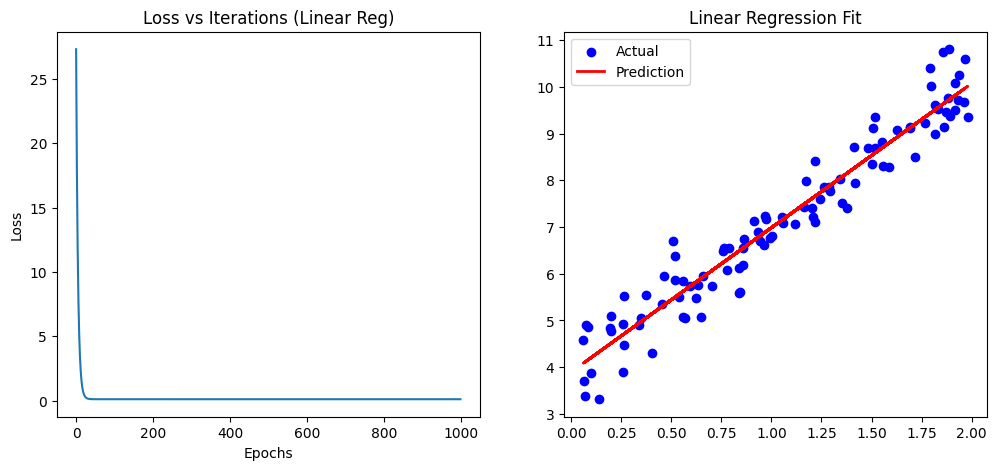

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lin_reg.history)
plt.title("Loss vs Iterations (Linear Reg)")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, predictions, color='red', linewidth=2, label='Prediction')
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


The **Binary Cross Entropy Loss** with L2 Regularization is:

$$J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$$

The gradient update rules are:

$$dw = \frac{1}{m} X^T (\hat{y} - y) + \frac{\lambda}{m} w$$

$$db = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})$$

In [12]:

def sigmoid(z):
    z = np.clip(z, -500, 500)

    return 1 / (1 + np.exp(-z))


In [13]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.history = []

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias

            y_pred = sigmoid(linear_model)

            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)

            bce_loss = - (1 / n_samples) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights ** 2)
            self.history.append(bce_loss + l2_penalty)

            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

Binary Classification Data

In [14]:
from sklearn.datasets import make_classification

In [15]:
X_class, y_class = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                       n_clusters_per_class=1, random_state=42)

Applying Scaling

In [16]:
scaler_log = StandardScalerManual()
X_class_scaled = scaler_log.fit_transform(X_class)

Training Model

In [17]:
log_reg = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
log_reg.fit(X_class_scaled, y_class)

In [18]:
final_preds = log_reg.predict(X_class_scaled)
accuracy = np.mean(final_preds == y_class)

In [19]:
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")

Final Training Accuracy: 84.00%


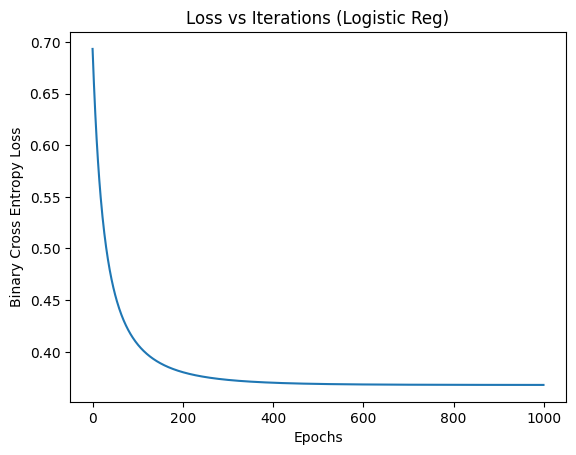

In [20]:
plt.plot(log_reg.history)
plt.title("Loss vs Iterations (Logistic Reg)")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy Loss")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [21]:
from sklearn.cluster import KMeans

def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n_rows, n_cols = M.shape

    flat_data = M.reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42, n_init=10)
    kmeans.fit(flat_data)

    labels_flat = kmeans.labels_
    assignment_table = labels_flat.reshape(n_rows, n_cols)

    centroids = kmeans.cluster_centers_

    cookbook = {i: [] for i in range(k)}

    for r in range(n_rows):
        for c in range(n_cols):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))

    return assignment_table, cookbook, centroids

In [23]:
M = np.random.randint(0, 255, size=(10, 10))

assignment, cookbook, centroids = kmeans_matrix(M, k=3)

In [24]:
print("Centroids (Cluster centers):")
print(centroids.flatten())

Centroids (Cluster centers):
[220.85294118 124.63636364  32.27272727]


In [25]:
print("\nPartial Assignment Table (Top 5 rows):")
print(assignment[:5])


Partial Assignment Table (Top 5 rows):
[[2 1 0 0 1 1 1 2 2 2]
 [0 2 2 0 2 0 0 1 2 1]
 [2 0 0 2 1 2 1 2 2 0]
 [0 2 0 1 0 2 2 0 1 2]
 [2 2 1 0 1 1 1 2 1 1]]


In [26]:
print(f"\nExample positions for Cluster 0: {cookbook[0][:5]} ...")


Example positions for Cluster 0: [(0, 2), (0, 3), (1, 0), (1, 3), (1, 5)] ...



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.


Standardization vs No Standardization

demonstration for Extreme Data
Feature 1 is normal (0-10), Feature 2 is Massive (0-100,000)

In [48]:
np.random.seed(42)
m = 100
X_raw = np.zeros((m, 2))
X_raw[:, 0] = np.random.rand(m) * 10
X_raw[:, 1] = np.random.rand(m) * 100000

True relation

In [49]:
y_raw = 2 * X_raw[:, 0] + 3 * X_raw[:, 1] + np.random.randn(m)

Train Model without Scaling, microscopic learning rate.

In [50]:
model_no_scale = LinearRegressionManual(lr=1e-11, epochs=100, l2_lambda=0)
model_no_scale.fit(X_raw, y_raw)

Train Model with Scaling

In [51]:
scaler_bonus = StandardScalerManual()
X_scaled_bonus = scaler_bonus.fit_transform(X_raw)

With scaling, we can use a standard aggressive learning rate

In [52]:
model_with_scale = LinearRegressionManual(lr=0.5, epochs=100, l2_lambda=0)
model_with_scale.fit(X_scaled_bonus, y_raw)

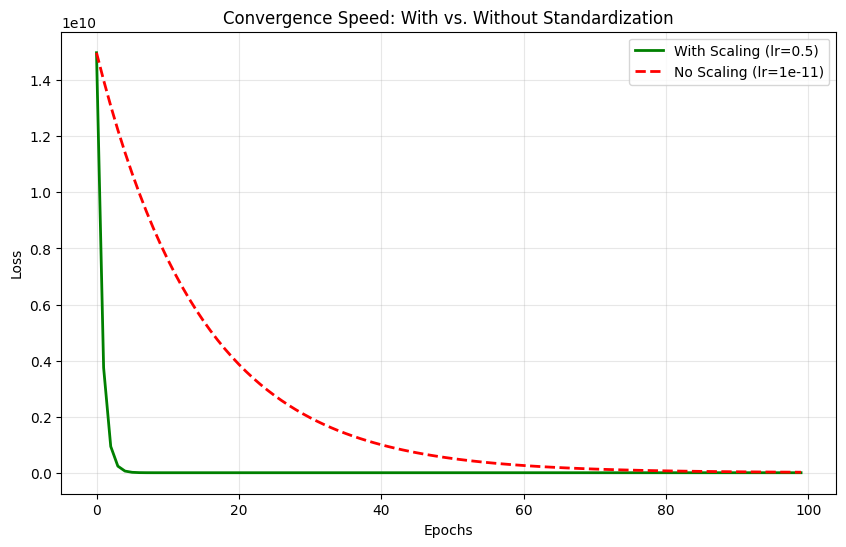

In [54]:
plt.figure(figsize=(10, 6))

plt.plot(model_with_scale.history, label="With Scaling (lr=0.5)", color='green', linewidth=2)

plt.plot(model_no_scale.history, label="No Scaling (lr=1e-11)", color='red', linestyle='--', linewidth=2)

plt.title("Convergence Speed: With vs. Without Standardization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The Standardized model (Green) minimizes loss instantly.
The Unscaled model (Red) is stuck. If we tried to increase its LR to make it faster,
it would mathematically explode (NaN) due to the large input values.

synthetic data

In [38]:
np.random.seed(42)
X_reg = np.random.rand(50, 5)  # 50 samples, 5 features
true_weights = np.array([5, -3, 8, 0, 1]) # True coefficients
y_reg = np.dot(X_reg, true_weights) + np.random.randn(50) * 0.5 # Add noise

Scaling it

In [39]:
scaler_reg = StandardScalerManual()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

Lambdas to test

In [40]:
lambdas = [0, 1.0, 10.0, 100.0]
results = {}

Lambda     | Weights (L2 Norm)    | Final Loss
--------------------------------------------------
0          | 2.9491               | 0.1439    
1.0        | 2.8634               | 0.2283    
10.0       | 2.2724               | 0.8138    
100.0      | 0.7504               | 2.3430    


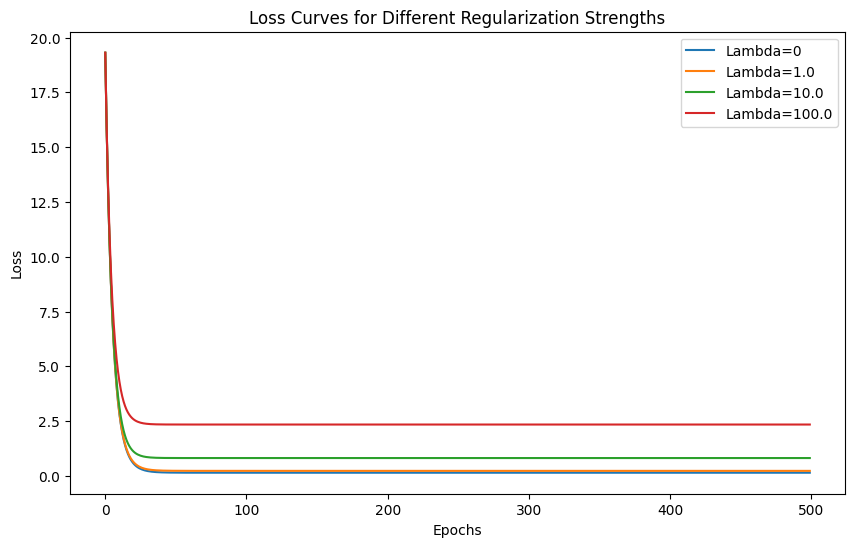

In [43]:
print(f"{'Lambda':<10} | {'Weights (L2 Norm)':<20} | {'Final Loss':<10}")
print("-" * 50)

plt.figure(figsize=(10, 6))

for lam in lambdas:
    # Train a model for each lambda
    model = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=lam)
    model.fit(X_reg_scaled, y_reg)

    # Store weights magnitude (L2 norm) to see shrinkage
    weight_magnitude = np.sqrt(np.sum(model.weights**2))
    final_loss = model.history[-1]

    print(f"{lam:<10} | {weight_magnitude:<20.4f} | {final_loss:<10.4f}")

    # Plot loss curve
    plt.plot(model.history, label=f"Lambda={lam}")

plt.title("Loss Curves for Different Regularization Strengths")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

As Lambda increases, the magnitude of the weights decreases (shrinks).
This reduces model complexity and helps prevent overfitting.